In [1]:
library(glmnet)
library(ggplot2)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-13



In [2]:
options(stringsAsFactors = FALSE)

In [3]:
base_dir <- "/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/feature_selection/"

In [4]:
load(paste0(base_dir, "early_late_cytokine.RData"))

In [5]:
length(bootstraps)

[1] 1000

In [6]:
lambda_sequence <- bootstraps[[1]][["lambda"]]
genes <- rownames(coef(bootstraps[[1]], s = lambda_sequence[1]))

In [7]:
head(genes)

[1] "(Intercept)"  "TTN_HUMAN"    "AATF_HUMAN"   "NEXN_HUMAN"   "SOD2_HUMAN"  
[6] "MALAT1_HUMAN"

In [8]:
head(lambda_sequence)

[1] 0.5630120 0.5350366 0.5084513 0.4831870 0.4591781 0.4363621

In [9]:
genes <- genes[2:length(genes)]

In [10]:
head(genes)
length(genes)
num_genes <- length(genes)

[1] "TTN_HUMAN"    "AATF_HUMAN"   "NEXN_HUMAN"   "SOD2_HUMAN"   "MALAT1_HUMAN"
[6] "PIGP_HUMAN"

[1] 22187

In [11]:
nonzero_gene_count <- c()
lambda <- min(lambda_sequence)

genes_coeff <- coef(bootstraps[[1]], s = lambda)
genes_coeff <- genes_coeff[2:length(genes_coeff),]
gene_names <- names(genes_coeff)
genes_nonzero <- gene_names[abs(genes_coeff) > 0]
nonzero_gene_count <- c(nonzero_gene_count, length(genes_nonzero))

genes_intersect <- genes_nonzero

for (i in 2:length(bootstraps)) {
    lambda_seq <- bootstraps[[i]][["lambda"]]
    if (lambda < tail(lambda_seq, n = 1)) {
        print(i)
    } 
    genes_coeff <- coef(bootstraps[[i]], s = lambda)
    genes_coeff <- genes_coeff[2:length(genes_coeff),]
    gene_names <- names(genes_coeff)
    genes_nonzero <- gene_names[abs(genes_coeff) > 0]
    nonzero_gene_count <- c(nonzero_gene_count, length(genes_nonzero))
    genes_intersect <- intersect(genes_intersect, genes_nonzero)
}

### Non-zero genes in all rounds

In [12]:
print(length(genes_intersect))
genes_intersect

[1] 54


[1] "MAN1C1_HUMAN"        "MYH6_HUMAN"          "INPP4B_HUMAN"       
 [4] "COL2A1_HUMAN"        "FAM189A2_HUMAN"      "FHOD3_HUMAN"        
 [7] "GRIN2A_HUMAN"        "MYL4_HUMAN"          "SIPA1L2_HUMAN"      
[10] "PCDH7_HUMAN"         "NAV1_HUMAN"          "PRTG_HUMAN"         
[13] "PLN_HUMAN"           "VCAN_HUMAN"          "MYO1D_HUMAN"        
[16] "CNTN5_HUMAN"         "PRICKLE1_HUMAN"      "SEMA3C_HUMAN"       
[19] "DAB1_HUMAN"          "BMPER_HUMAN"         "FN1_HUMAN"          
[22] "FAM19A4_HUMAN"       "GPC3_HUMAN"          "SAMD4A_HUMAN"       
[25] "ATP13A3_HUMAN"       "SREBF2_HUMAN"        "STK39_HUMAN"        
[28] "RBMS3_HUMAN"         "RPL37A_HUMAN"        "TANC2_HUMAN"        
[31] "MYH7_HUMAN"          "EGFEM1P_HUMAN"       "ITGAV_HUMAN"        
[34] "FBXL7_HUMAN"         "BMP2_HUMAN"          "SORCS3_HUMAN"       
[37] "RNF150_HUMAN"        "ADAM28_HUMAN"        "SDK1_HUMAN"         
[40] "MEF2C_HUMAN"         "H19_HUMAN"           "FLRT2_HUMAN"        
[43] "LINC00881_HUMAN"     "EZR_HUMAN"           "RXRG_HUMAN"         
[46] "DACH1_HUMAN"         "C20orf166-AS1_HUMAN" "SV2C_HUMAN"         
[49] "PRSS35_HUMAN"        "HECW2_HUMAN"         "CPNE4_HUMAN"        
[52] "DOK4_HUMAN"          "CCND1_HUMAN"         "OTOGL_HUMAN"

### Distribution of non-zero genes at min lambda

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


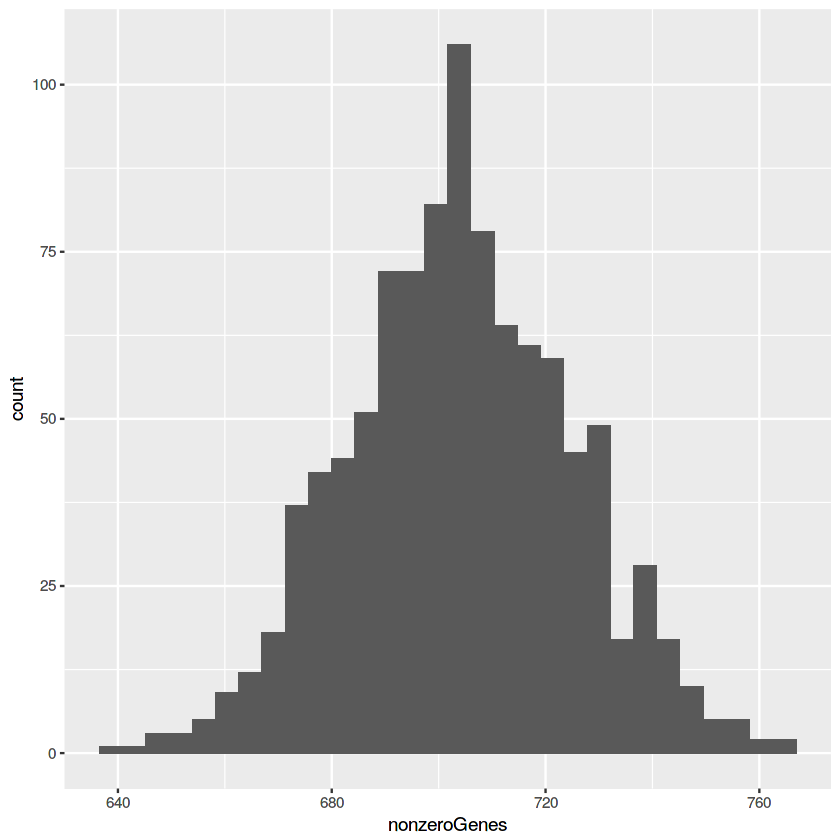

In [13]:
nonzero_gene_count <- as.data.frame(nonzero_gene_count)
colnames(nonzero_gene_count) <- "nonzeroGenes"
ggplot(nonzero_gene_count) + geom_histogram(aes(nonzeroGenes))

### Compare gene list to previous analysis (remove_1s2exp data)

In [14]:
remove_1st2exp_genes <- c('MAN1C1_HUMAN','MYH6_HUMAN','INPP4B_HUMAN','COL2A1_HUMAN','CCDC141_HUMAN','ROBO2_HUMAN','FAM189A2_HUMAN','FHOD3_HUMAN','GRIN2A_HUMAN','MYL4_HUMAN','SIPA1L2_HUMAN','NAV1_HUMAN','PRTG_HUMAN','PLN_HUMAN','VCAN_HUMAN','MYO1D_HUMAN','CNTN5_HUMAN','COLEC12_HUMAN','PRICKLE1_HUMAN','SEMA3C_HUMAN','BMPER_HUMAN','FAM19A4_HUMAN','ARHGAP42_HUMAN','GPC3_HUMAN','SAMD4A_HUMAN','ATP13A3_HUMAN','MID1_HUMAN','LSAMP_HUMAN','TANC2_HUMAN','MYH7_HUMAN','ITGAV_HUMAN','FBXL7_HUMAN','BMP2_HUMAN','RNF150_HUMAN','ADAM28_HUMAN','SDK1_HUMAN','MEF2C_HUMAN','H19_HUMAN','FLRT2_HUMAN','LINC00881_HUMAN','EDA_HUMAN','EZR_HUMAN','RXRG_HUMAN','C20orf166-AS1_HUMAN','SV2C_HUMAN','PRSS35_HUMAN','HECW2_HUMAN','CPNE4_HUMAN','CCND1_HUMAN','OTOGL_HUMAN')
x <- intersect(remove_1st2exp_genes, genes_intersect)
x
length(x)

[1] "MAN1C1_HUMAN"        "MYH6_HUMAN"          "INPP4B_HUMAN"       
 [4] "COL2A1_HUMAN"        "FAM189A2_HUMAN"      "FHOD3_HUMAN"        
 [7] "GRIN2A_HUMAN"        "MYL4_HUMAN"          "SIPA1L2_HUMAN"      
[10] "NAV1_HUMAN"          "PRTG_HUMAN"          "PLN_HUMAN"          
[13] "VCAN_HUMAN"          "MYO1D_HUMAN"         "CNTN5_HUMAN"        
[16] "PRICKLE1_HUMAN"      "SEMA3C_HUMAN"        "BMPER_HUMAN"        
[19] "FAM19A4_HUMAN"       "GPC3_HUMAN"          "SAMD4A_HUMAN"       
[22] "ATP13A3_HUMAN"       "TANC2_HUMAN"         "MYH7_HUMAN"         
[25] "ITGAV_HUMAN"         "FBXL7_HUMAN"         "BMP2_HUMAN"         
[28] "RNF150_HUMAN"        "ADAM28_HUMAN"        "SDK1_HUMAN"         
[31] "MEF2C_HUMAN"         "H19_HUMAN"           "FLRT2_HUMAN"        
[34] "LINC00881_HUMAN"     "EZR_HUMAN"           "RXRG_HUMAN"         
[37] "C20orf166-AS1_HUMAN" "SV2C_HUMAN"          "PRSS35_HUMAN"       
[40] "HECW2_HUMAN"         "CPNE4_HUMAN"         "CCND1_HUMAN"        
[43] "OTOGL_HUMAN"

[1] 43

Majority of genes (43) are detected in both analyses

### Caclulate fold changes for genes

In [15]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [45]:
load("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/train_cm_filtered_cells_entrez_only_normalized_counts.RData")

In [46]:
cell_metadata <- read.csv("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/train_cm_filtered_cells_entrez_only_metadata.csv")

In [47]:
head(cell_metadata)

X                      nGene nUMI orig.ident    day protocol cell_line
1 AAACATCGAAACATCG_14_6  1577  2986 SeuratProject D12 Lian     AICS11   
2 AAACATCGAAACATCG_21_10  578   727 SeuratProject D14 Murry    AICS0    
3 AAACATCGAACAACCA_2_9    489   606 SeuratProject D12 Lian     AICS37   
4 AAACATCGAACAACCA_5_8   1117  1511 SeuratProject D14 Murry    AICS0    
5 AAACATCGAACGCTTA_32_8   940  1599 SeuratProject D24 Lian     AICS11   
6 AAACATCGAACTCACC_26_2  2282  4392 SeuratProject D12 Lian     AICS37   
  diff_harvest passage scientist diff_exp  sci_exp ctnt cell_sample
1 08_8_2017    44      KG        7_24_2017 KG_7_24 90   15         
2 08_11_2017   28      KG        7_27_2017 KG_7_27 78   22         
3 07_24_2017   34      AN        7_10_2017 AN_7_10 89    3         
4 07_28_2017   32      AN        7_13_2017 AN_7_13 75    6         
5 08_18_2017   44      KG        7_24_2017 KG_7_24 92   33         
6 08_11_2017   37      KG        7_27_2017 KG_7_27 87   27

In [48]:
cardioAICS <- t(cardioAICS)

cytokine_cells <- cell_metadata$protocol == "Murry"
cardioAICS <- cardioAICS[cytokine_cells,]

diff_day <- cell_metadata$day[cytokine_cells]

diff_day <- gsub('D12|D14', "early", diff_day)
diff_day <- gsub('D24|D26', "late", diff_day)
names(diff_day) <- cell_metadata$X[cytokine_cells]

cell_metadata <- cell_metadata[cytokine_cells,]

In [49]:
head(cell_metadata)

X                      nGene nUMI orig.ident    day protocol cell_line
2  AAACATCGAAACATCG_21_10  578   727 SeuratProject D14 Murry    AICS0    
4  AAACATCGAACAACCA_5_8   1117  1511 SeuratProject D14 Murry    AICS0    
9  AAACATCGAAGACGGA_9_1   1851  2971 SeuratProject D14 Murry    AICS37   
10 AAACATCGAAGAGATC_1_8   1975  3343 SeuratProject D14 Murry    AICS0    
12 AAACATCGAAGGACAC_35_12 1659  2651 SeuratProject D26 Murry    AICS11   
15 AAACATCGAAGGTACA_7_9    618   800 SeuratProject D14 Murry    AICS11   
   diff_harvest passage scientist diff_exp  sci_exp ctnt cell_sample
2  08_11_2017   28      KG        7_27_2017 KG_7_27 78   22         
4  07_28_2017   32      AN        7_13_2017 AN_7_13 75    6         
9  07_28_2017   35      AN        7_13_2017 AN_7_13 96   10         
10 07_24_2017   31      AN        7_10_2017 AN_7_10 92    2         
12 08_18_2017   44      AN        7_24_2017 AN_7_24 92   36         
15 07_28_2017   42      CD        7_13_2017 CD_7_13 94    8

In [138]:
genes.use <- genes_intersect

late_cells <- cell_metadata$X[cell_metadata$day %in% c("D24", "D26")]
early_cells <- cell_metadata$X[cell_metadata$day %in% c("D12", "D14")]

early_exp_mat <- cardioAICS[early_cells,]
late_exp_mat <- cardioAICS[late_cells,]

foldChange_list <- list()
for (i in 1:length(genes.use)) {
    gene <- genes.use[i]
    early_exp <- early_exp_mat[,gene]
    late_exp <- late_exp_mat[,gene]
    log2fc <- log2(mean(expm1(early_exp)) + 1) - log2(mean(expm1(late_exp)) + 1)
    foldChange_list[[gene]] <- log2fc
    
}

lfc_df <- data.frame("log2fc" = as.numeric(foldChange_list), "gene" = names(foldChange_list), row.names = names(foldChange_list))
lfc_df <- dplyr::arrange(lfc_df, log2fc)

In [139]:
lfc_df

log2fc     gene               
1  -1.5814585 INPP4B_HUMAN       
2  -1.5719583 MYH7_HUMAN         
3  -1.5587981 CNTN5_HUMAN        
4  -1.1858179 NAV1_HUMAN         
5  -1.1511293 FBXL7_HUMAN        
6  -0.9681789 PLN_HUMAN          
7  -0.9094752 HECW2_HUMAN        
8  -0.9065254 EZR_HUMAN          
9  -0.8725032 H19_HUMAN          
10 -0.8662031 SV2C_HUMAN         
11 -0.8610488 PRSS35_HUMAN       
12 -0.8557119 FLRT2_HUMAN        
13 -0.7604351 ATP13A3_HUMAN      
14 -0.7549107 RNF150_HUMAN       
15 -0.6934602 MAN1C1_HUMAN       
16 -0.6842972 FHOD3_HUMAN        
17 -0.6622664 PRICKLE1_HUMAN     
18 -0.6071789 STK39_HUMAN        
19 -0.5722682 LINC00881_HUMAN    
20 -0.5645306 SORCS3_HUMAN       
21 -0.5425835 SIPA1L2_HUMAN      
22 -0.5159151 EGFEM1P_HUMAN      
23 -0.4501904 CCND1_HUMAN        
24 -0.4345481 ITGAV_HUMAN        
25  0.3313095 RBMS3_HUMAN        
26  0.4104702 MYL4_HUMAN         
27  0.4167580 OTOGL_HUMAN        
28  0.4280737 SREBF2_HUMAN       
29  0.4338801 DACH1_HUMAN        
30  0.4675087 RPL37A_HUMAN       
31  0.4686764 PCDH7_HUMAN        
32  0.4702568 FN1_HUMAN          
33  0.4938528 RXRG_HUMAN         
34  0.5129335 C20orf166-AS1_HUMAN
35  0.5197608 CPNE4_HUMAN        
36  0.6008904 TANC2_HUMAN        
37  0.6106758 FAM189A2_HUMAN     
38  0.6157801 DOK4_HUMAN         
39  0.6740574 SAMD4A_HUMAN       
40  0.7418064 MYO1D_HUMAN        
41  0.7514381 PRTG_HUMAN         
42  0.7948681 SDK1_HUMAN         
43  0.8325054 ADAM28_HUMAN       
44  0.8550533 DAB1_HUMAN         
45  0.8926314 SEMA3C_HUMAN       
46  0.9060459 MYH6_HUMAN         
47  0.9382511 BMP2_HUMAN         
48  0.9551420 MEF2C_HUMAN        
49  1.0731256 COL2A1_HUMAN       
50  1.0932719 BMPER_HUMAN        
51  1.1520767 GRIN2A_HUMAN       
52  1.2083794 GPC3_HUMAN         
53  1.3786996 VCAN_HUMAN         
54  1.4387179 FAM19A4_HUMAN

### Fit using 54 genes

In [53]:
diff_day <- as.factor(diff_day)

In [54]:
head(diff_day)

AAACATCGAAACATCG_21_10   AAACATCGAACAACCA_5_8   AAACATCGAAGACGGA_9_1 
                 early                  early                  early 
  AAACATCGAAGAGATC_1_8 AAACATCGAAGGACAC_35_12   AAACATCGAAGGTACA_7_9 
                 early                   late                  early 
Levels: early late

In [55]:
library(boot)

In [56]:
subset_cardio <- cardioAICS[,genes.use]
subset_cardio <- as.data.frame(as.matrix(subset_cardio))

In [57]:
head(subset_cardio)

MAN1C1_HUMAN MYH6_HUMAN INPP4B_HUMAN COL2A1_HUMAN
AAACATCGAAACATCG_21_10 0            4.245287   0.000000     3.350266    
AAACATCGAACAACCA_5_8   0            4.607887   2.030531     2.030531    
AAACATCGAAGACGGA_9_1   0            4.483145   0.000000     0.000000    
AAACATCGAAGAGATC_1_8   0            4.688479   0.000000     1.943429    
AAACATCGAAGGACAC_35_12 0            3.749358   0.000000     0.000000    
AAACATCGAAGGTACA_7_9   0            2.602690   0.000000     0.000000    
                       FAM189A2_HUMAN FHOD3_HUMAN GRIN2A_HUMAN MYL4_HUMAN
AAACATCGAAACATCG_21_10 0.000000       3.350266    0            2.691593  
AAACATCGAACAACCA_5_8   2.030531       3.037565    0            3.037565  
AAACATCGAAGACGGA_9_1   1.473817       2.045334    0            2.671627  
AAACATCGAAGAGATC_1_8   2.299979       0.000000    0            3.088278  
AAACATCGAAGGACAC_35_12 2.988748       3.162643    0            0.000000  
AAACATCGAAGGTACA_7_9   0.000000       3.258097    0            2.602690  
                       SIPA1L2_HUMAN PCDH7_HUMAN ⋯ RXRG_HUMAN DACH1_HUMAN
AAACATCGAAACATCG_21_10 0.000000      0.000000    ⋯ 0          0          
AAACATCGAACAACCA_5_8   0.000000      2.030531    ⋯ 0          0          
AAACATCGAAGACGGA_9_1   0.000000      3.053776    ⋯ 0          0          
AAACATCGAAGAGATC_1_8   1.943429      3.431185    ⋯ 0          0          
AAACATCGAAGGACAC_35_12 2.778114      3.912785    ⋯ 0          0          
AAACATCGAAGGTACA_7_9   0.000000      2.602690    ⋯ 0          0          
                       C20orf166-AS1_HUMAN SV2C_HUMAN PRSS35_HUMAN HECW2_HUMAN
AAACATCGAAACATCG_21_10 0                   0.000000   0.000000     0          
AAACATCGAACAACCA_5_8   0                   2.030531   0.000000     0          
AAACATCGAAGACGGA_9_1   0                   0.000000   0.000000     0          
AAACATCGAAGAGATC_1_8   0                   0.000000   0.000000     0          
AAACATCGAAGGACAC_35_12 0                   0.000000   1.562799     0          
AAACATCGAAGGTACA_7_9   0                   0.000000   0.000000     0          
                       CPNE4_HUMAN DOK4_HUMAN CCND1_HUMAN OTOGL_HUMAN
AAACATCGAAACATCG_21_10 0           2.691593   0.000000    0          
AAACATCGAACAACCA_5_8   0           2.030531   2.030531    0          
AAACATCGAAGACGGA_9_1   0           2.045334   0.000000    0          
AAACATCGAAGAGATC_1_8   0           0.000000   0.000000    0          
AAACATCGAAGGACAC_35_12 0           0.000000   0.000000    0          
AAACATCGAAGGTACA_7_9   0           0.000000   0.000000    0

In [58]:
cost <- function(r, pi = 0) mean(abs(r-pi) > 0.5)

In [59]:
fit <- glm(diff_day ~ .,
    data = subset_cardio, family = binomial("logit")
   )

In [60]:
fit


Call:  glm(formula = diff_day ~ ., family = binomial("logit"), data = subset_cardio)

Coefficients:
          (Intercept)           MAN1C1_HUMAN             MYH6_HUMAN  
             -0.03769                0.38542               -0.28842  
         INPP4B_HUMAN           COL2A1_HUMAN         FAM189A2_HUMAN  
              0.73833               -0.52370               -0.40660  
          FHOD3_HUMAN           GRIN2A_HUMAN             MYL4_HUMAN  
              0.49318               -0.81177               -0.57948  
        SIPA1L2_HUMAN            PCDH7_HUMAN             NAV1_HUMAN  
              0.30329               -0.38803                0.54694  
           PRTG_HUMAN              PLN_HUMAN             VCAN_HUMAN  
             -0.42138                0.63777               -0.65038  
          MYO1D_HUMAN            CNTN5_HUMAN         PRICKLE1_HUMAN  
             -0.24361                0.51896                0.36072  
         SEMA3C_HUMAN             DAB1_HUMAN            BMP

In [61]:
subset_cardio$diff_day <- diff_day

In [62]:
cv.test <- cv.glm(subset_cardio, cost = cost, fit, K = 5)

In [63]:
cv.test$delta

[1] 0.04113627 0.04054670

In [99]:
load("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/holdout_cm_filtered_cells_entrez_only_normalized_counts.RData")
holdout_cell_metadata <- read.csv("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/holdout_cm_filtered_cells_entrez_only_metadata.csv")

In [100]:
holdout_cardioAICS <- t(holdout_cardioAICS)
holdout_cytokine_cells <- holdout_cell_metadata$protocol == "Murry"
holdout_cardioAICS <- holdout_cardioAICS[holdout_cytokine_cells,]

diff_day <- holdout_cell_metadata$day[holdout_cytokine_cells]

diff_day <- gsub('D12|D14', "early", diff_day)
diff_day <- gsub('D24|D26', "late", diff_day)
names(diff_day) <- holdout_cell_metadata$X[holdout_cytokine_cells]

holdout_cell_metadata <- holdout_cell_metadata[holdout_cytokine_cells,]

In [101]:
holdout_cardioAICS

   [[ suppressing 33 column names ‘TTN_HUMAN’, ‘AATF_HUMAN’, ‘NEXN_HUMAN’ ... ]]


841 x 22187 sparse Matrix of class "dgCMatrix"
                                                                      
AAACATCGAACAACCA_25_11 5.440014 .         2.3570950 .         5.628508
AAACATCGATCCTGTA_47_6  6.525517 .         3.3498237 .         5.684630
AACAACCAAAGGACAC_29_6  6.380718 .         2.1503907 0.8174433 6.200447
AACAACCAACGCTCGA_45_4  3.057713 .         .         .         5.279052
AACAACCAATGCCTAA_3_9   6.145289 .         2.2572998 1.4867954 5.416988
AACAACCAATTGAGGA_5_4   4.667861 .         1.2391808 1.2391808 5.862915
AACAACCACAGATCTG_13_8  2.002126 .         0.7263226 .         5.373240
AACAACCACCTAATCC_1_3   6.123658 .         3.7928779 .         6.544118
AACAACCACTGTAGCC_11_7  6.575511 1.0199477 2.4543012 1.0199477 6.314306
AACAACCAGCCACATA_42_8  6.446798 .         2.3607381 1.5768132 5.891406
AACAACCAGCTAACGA_40_3  .        .         .         1.7449994 5.775672
AACAACCATTCACGCA_37_10 6.365407 .         2.8535218 .         4.623181
AACCGAGAAAACATCG_11_10 6.41004

In [104]:
holdout_mat <- holdout_cardioAICS[,genes.use]
holdout_mat <- as.data.frame(as.matrix(holdout_mat))

In [105]:
holdout_mat

MAN1C1_HUMAN MYH6_HUMAN INPP4B_HUMAN COL2A1_HUMAN
AAACATCGAACAACCA_25_11 0.0000000    2.357095   0.0000000    0.0000000   
AAACATCGATCCTGTA_47_6  1.4000249    2.961752   0.0000000    1.4000249   
AACAACCAAAGGACAC_29_6  1.8015132    4.675023   1.5673873    1.2611291   
AACAACCAACGCTCGA_45_4  0.0000000    2.930873   0.0000000    1.2626721   
AACAACCAATGCCTAA_3_9   0.0000000    5.021295   0.9974834    2.6872757   
AACAACCAATTGAGGA_5_4   0.0000000    1.239181   0.0000000    1.2391808   
AACAACCACAGATCTG_13_8  0.0000000    1.662003   0.0000000    0.7263226   
AACAACCACCTAATCC_1_3   0.0000000    4.190804   0.0000000    0.0000000   
AACAACCACTGTAGCC_11_7  0.0000000    4.024718   0.0000000    1.8435845   
AACAACCAGCCACATA_42_8  1.5768132    3.256434   1.5768132    0.0000000   
AACAACCAGCTAACGA_40_3  0.0000000    0.000000   0.0000000    0.0000000   
AACAACCATTCACGCA_37_10 1.8640168    2.216416   2.2164156    0.0000000   
AACCGAGAAAACATCG_11_10 0.0000000    4.640497   0.8047306    2.1302016   
AACCGAGAAACGCTTA_42_10 0.0000000    0.000000   0.0000000    0.0000000   
AACCGAGAAGAGTCAA_25_3  0.7567554    4.909935   0.0000000    1.4802511   
AACCGAGAAGTACAAG_15_4  0.0000000    0.000000   0.0000000    0.0000000   
AACCGAGAATCCTGTA_23_6  0.0000000    2.545600   0.0000000    1.6626085   
AACCGAGAATCCTGTA_5_6   0.0000000    2.920139   0.9535466    2.1943852   
AACCGAGACCTCTATC_42_9  2.6907383    2.690738   2.3186262    0.0000000   
AACCGAGACTGTAGCC_17_8  0.0000000    5.028422   0.0000000    1.3653651   
AACCGAGAGCTAACGA_7_5   2.1283521    3.788104   0.0000000    1.2432908   
AACGCTTAACCTCCAA_27_11 1.8126874    4.734369   0.0000000    0.0000000   
AACGCTTACAGATCTG_19_6  0.0000000    5.020883   0.0000000    1.8231305   
AACGCTTACATACCAA_25_8  2.0312984    4.360289   1.1656455    2.4882315   
AACGCTTACCGACAAC_42_1  0.0000000    0.000000   0.0000000    0.0000000   
AACGCTTACCTCCTGA_47_3  0.9936108    3.811655   0.0000000    1.4820451   
AACGCTTACTAAGGTC_9_7   0.0000000    4.677642   0.0000000    2.2358275   
AACGCTTAGCCACATA_47_12 0.0000000    2.368775   1.0773404    0.0000000   
AACGCTTAGTACGCAA_11_9  0.0000000    4.443686   2.0106681    0.0000000   
AACGCTTAGTACGCAA_40_7  1.5049335    3.677373   1.5049335    0.0000000   
⋮                      ⋮            ⋮          ⋮            ⋮           
TGGCTTCAAGATGTAC_25_7  0.0000000    3.898541   0.0000000    0.0000000   
TGGCTTCAAGCCATGC_27_12 0.0000000    4.500944   0.0000000    1.4877232   
TGGCTTCACAAGACTA_3_9   0.0000000    4.269385   0.0000000    0.0000000   
TGGCTTCACACCTTAC_45_2  0.0000000    0.000000   0.0000000    0.0000000   
TGGCTTCAGACAGTGC_5_9   0.0000000    5.326084   0.0000000    1.8539561   
TGGCTTCAGCGAGTAA_27_12 1.4244495    4.400198   0.0000000    2.3481996   
TGGCTTCAGTCTGTCA_25_5  0.0000000    3.764331   0.0000000    0.0000000   
TGGCTTCATGGCTTCA_25_5  1.7631744    4.921672   0.6760944    1.5820121   
TGGTGGTAAAGACGGA_13_2  0.0000000    5.119000   0.0000000    2.8688539   
TGGTGGTAAAGGTACA_27_1  1.8572563    3.905104   0.0000000    1.6202991   
TGGTGGTAACAAGCTA_23_12 0.0000000    4.516898   0.0000000    2.0230934   
TGGTGGTAAGATGTAC_27_7  2.1247742    4.597945   0.0000000    0.0000000   
TGGTGGTAAGGCTAAC_13_11 0.0000000    3.540751   0.0000000    0.0000000   
TGGTGGTAATAGCGAC_29_7  0.0000000    0.000000   0.0000000    0.0000000   
TGGTGGTACACCTTAC_1_1   1.5867883    3.903997   2.1720264    1.0797734   
TGGTGGTACGAACTTA_31_5  0.0000000    3.438764   2.7023444    1.1996965   
TGGTGGTAGATGAATC_45_11 0.0000000    3.347615   0.0000000    0.0000000   
TGGTGGTAGGAGAACA_29_8  2.1059626    4.386580   1.5276862    1.5276862   
TGGTGGTAGTCGTAGA_5_5   0.0000000    3.621710   0.0000000    1.8245828   
TGGTGGTATTCACGCA_21_1  0.0000000    4.471728   0.9233382    0.9233382   
TTCACGCAAAGGACAC_3_5   0.0000000    4.661295   0.0000000    0.0000000   
TTCACGCAAAGGTACA_35_11 1.0624948    4.315481   0.0000000    1.0624948   
TTCACGCAACACGACC_11_3  0.0000000    3.274546   0.0000000    0.0000000   
TTCACGCA

In [106]:
dim(holdout_mat)

[1] 841  54

In [107]:
holdout_predict <- predict(fit, newdata = holdout_mat, type = c("response"))

In [110]:
holdout_predict

AAACATCGAACAACCA_25_11  AAACATCGATCCTGTA_47_6  AACAACCAAAGGACAC_29_6 
          2.185129e-03           9.981393e-01           9.865544e-01 
 AACAACCAACGCTCGA_45_4   AACAACCAATGCCTAA_3_9   AACAACCAATTGAGGA_5_4 
          8.090483e-01           3.216682e-05           9.335368e-05 
 AACAACCACAGATCTG_13_8   AACAACCACCTAATCC_1_3  AACAACCACTGTAGCC_11_7 
          1.357319e-02           3.663552e-04           2.110292e-06 
 AACAACCAGCCACATA_42_8  AACAACCAGCTAACGA_40_3 AACAACCATTCACGCA_37_10 
          9.999697e-01           8.317977e-01           9.948376e-01 
AACCGAGAAAACATCG_11_10 AACCGAGAAACGCTTA_42_10  AACCGAGAAGAGTCAA_25_3 
          1.487581e-03           9.999518e-01           3.524282e-05 
 AACCGAGAAGTACAAG_15_4  AACCGAGAATCCTGTA_23_6   AACCGAGAATCCTGTA_5_6 
          9.875145e-04           1.403231e-02           2.085737e-03 
 AACCGAGACCTCTATC_42_9  AACCGAGACTGTAGCC_17_8   AACCGAGAGCTAACGA_7_5 
          9.991962e-01           1.644237e-02           2.258960e-04 
AACGCTTAACCTCCAA_27_11  AACGCTTACAGATCTG_19_6  AACGCTTACATACCAA_25_8 
          1.668179e-06           8.745074e-02           4.489440e-03 
 AACGCTTACCGACAAC_42_1  AACGCTTACCTCCTGA_47_3   AACGCTTACTAAGGTC_9_7 
          2.299239e-01           9.974450e-01           5.406572e-05 
AACGCTTAGCCACATA_47_12  AACGCTTAGTACGCAA_11_9  AACGCTTAGTACGCAA_40_7 
          9.998333e-01           1.398596e-04           9.999941e-01 
AACGTGATACAGCAGA_19_11  AACGTGATAGAGTCAA_42_3  AACGTGATAGCCATGC_37_2 
          7.917106e-05           9.999976e-01           9.768671e-01 
 AACGTGATCAAGACTA_19_5 AACGTGATCACCTTAC_42_10   AACGTGATCACCTTAC_7_1 
          1.772450e-02           1.613585e-01           8.435045e-03 
AACGTGATCAGCGTTA_29_12  AACGTGATCCTAATCC_27_8 AACGTGATCGACTGGA_17_12 
          8.175838e-01           1.385458e-02           2.518125e-06 
 AACGTGATGACAGTGC_13_8  AACGTGATGATAGACA_42_4  AACTCACCAAGAGATC_27_9 
          2.159176e-04           9.995610e-01           2.086593e-04 
 AACTCACCACACGACC_37_3  AACTCACCAGAGTCAA_35_3  AACTCACCAGCACCTC_17_6 
          9.761921e-01           9.998504e-01           1.502135e-02 
 AACTCACCAGTGGTCA_17_9  AACTCACCCCAGTTCA_29_6  AACTCACCCGACTGGA_13_7 
          1.568882e-06           9.995207e-01           1.527168e-05 
 AACTCACCCGCATACA_45_6  AACTCACCCTGAGCCA_19_7  AACTCACCGCTAACGA_21_2 
          9.997173e-01           7.718045e-01           5.944381e-03 
 AAGACGGAAACGTGAT_25_9  AAGACGGAAAGACGGA_31_3  AAGACGGAAAGAGATC_13_3 
          3.966419e-06           9.999207e-01           2.263143e-02 
 AAGACGGAACACAGAA_29_6   AAGACGGAACAGATTC_7_9  AAGACGGAACGCTCGA_27_1 
          9.999990e-01           2.071089e-01           3.409137e-03 
AAGACGGAAGCCATGC_47_11  AAGACGGAATGCCTAA_13_5  AAGACGGACATACCAA_41_7 
          9.968970e-01           8.682768e-04           8.877011e-01 
  AAGACGGACCGACAAC_9_8  AAGACGGACCTCTATC_21_8 AAGACGGAGAGCTGAA_13_11 
          1.410393e-04           9.860940e-03           3.092410e-03 
  AAGACGGAGCGAGTAA_5_5  AAGACGGAGCTCGGTA_19_7  AAGACGGAGTCGTAGA_23_7 
          1.914490e-03           1.260189e-05           8.570985e-03 
 AAGACGGAGTCTGTCA_41_6   AAGAGATCACAGCAGA_7_5  AAGAGATCACATTGGC_33_7 
          9.993769e-01           1.485715e-02           3.480812e-01 
  AAGAGATCAGGCTAAC_7_4  AAGAGATCATAGCGAC_23_5 AAGAGATCATAGCGAC_39_12 
          1.388091e-04           1.665451e-03           9.999309e-01 
 AAGAGATCCTGAGCCA_45_1 AAGGACACAAGGTACA_17_11 AAGGACACACCACTGT_37_10 
          9.912663e-01           6.170825e-03           9.980210e-01 
AAGGACACCGACACAC_33_11 AAGGACACCTAAGGTC_42_11  AAGGACACGCCACATA_39_9 
          9.999999e-01           9.975708e-01           9.888724e-01 
  AAGGACACGCTAACGA_1_9 AAGGACACGTGTTCTA_27_10  AAGGACACTGGTGGTA_17_4 
          1.540893e-03           5.826895e-02           4.571387e-04 
 AAGGTACAACACAGAA_17_1   AAGGTACAACAGATTC_1_1   AAGGTACAACATTGGC_9_1 
          1.693641e-04           9.560246e-05           1.882570e-03 
 AAGGTACAATGCCTAA_25_7 AAGGTACAGCCACATA_21_12  AAGGTACATATCAGCA_17_2 
          

In [111]:
diff_day

AAACATCGAACAACCA_25_11  AAACATCGATCCTGTA_47_6  AACAACCAAAGGACAC_29_6 
               "early"                 "late"                 "late" 
 AACAACCAACGCTCGA_45_4   AACAACCAATGCCTAA_3_9   AACAACCAATTGAGGA_5_4 
                "late"                "early"                "early" 
 AACAACCACAGATCTG_13_8   AACAACCACCTAATCC_1_3  AACAACCACTGTAGCC_11_7 
               "early"                "early"                "early" 
 AACAACCAGCCACATA_42_8  AACAACCAGCTAACGA_40_3 AACAACCATTCACGCA_37_10 
                "late"                 "late"                 "late" 
AACCGAGAAAACATCG_11_10 AACCGAGAAACGCTTA_42_10  AACCGAGAAGAGTCAA_25_3 
               "early"                 "late"                "early" 
 AACCGAGAAGTACAAG_15_4  AACCGAGAATCCTGTA_23_6   AACCGAGAATCCTGTA_5_6 
               "early"                "early"                "early" 
 AACCGAGACCTCTATC_42_9  AACCGAGACTGTAGCC_17_8   AACCGAGAGCTAACGA_7_5 
                "late"                "early"                "early" 
AACGCTTAACCTCCAA_27_11  AACGCTTACAGATCTG_19_6  AACGCTTACATACCAA_25_8 
               "early"                "early"                "early" 
 AACGCTTACCGACAAC_42_1  AACGCTTACCTCCTGA_47_3   AACGCTTACTAAGGTC_9_7 
                "late"                 "late"                "early" 
AACGCTTAGCCACATA_47_12  AACGCTTAGTACGCAA_11_9  AACGCTTAGTACGCAA_40_7 
                "late"                "early"                 "late" 
AACGTGATACAGCAGA_19_11  AACGTGATAGAGTCAA_42_3  AACGTGATAGCCATGC_37_2 
               "early"                 "late"                 "late" 
 AACGTGATCAAGACTA_19_5 AACGTGATCACCTTAC_42_10   AACGTGATCACCTTAC_7_1 
               "early"                 "late"                "early" 
AACGTGATCAGCGTTA_29_12  AACGTGATCCTAATCC_27_8 AACGTGATCGACTGGA_17_12 
                "late"                "early"                "early" 
 AACGTGATGACAGTGC_13_8  AACGTGATGATAGACA_42_4  AACTCACCAAGAGATC_27_9 
               "early"                 "late"                "early" 
 AACTCACCACACGACC_37_3  AACTCACCAGAGTCAA_35_3  AACTCACCAGCACCTC_17_6 
                "late"                 "late"                "early" 
 AACTCACCAGTGGTCA_17_9  AACTCACCCCAGTTCA_29_6  AACTCACCCGACTGGA_13_7 
               "early"                 "late"                "early" 
 AACTCACCCGCATACA_45_6  AACTCACCCTGAGCCA_19_7  AACTCACCGCTAACGA_21_2 
                "late"                "early"                "early" 
 AAGACGGAAACGTGAT_25_9  AAGACGGAAAGACGGA_31_3  AAGACGGAAAGAGATC_13_3 
               "early"                 "late"                "early" 
 AAGACGGAACACAGAA_29_6   AAGACGGAACAGATTC_7_9  AAGACGGAACGCTCGA_27_1 
                "late"                "early"                "early" 
AAGACGGAAGCCATGC_47_11  AAGACGGAATGCCTAA_13_5  AAGACGGACATACCAA_41_7 
                "late"                "early"                 "late" 
  AAGACGGACCGACAAC_9_8  AAGACGGACCTCTATC_21_8 AAGACGGAGAGCTGAA_13_11 
               "early"                "early"                "early" 
  AAGACGGAGCGAGTAA_5_5  AAGACGGAGCTCGGTA_19_7  AAGACGGAGTCGTAGA_23_7 
               "early"                "early"                "early" 
 AAGACGGAGTCTGTCA_41_6   AAGAGATCACAGCAGA_7_5  AAGAGATCACATTGGC_33_7 
                "late"                "early"                 "late" 
  AAGAGATCAGGCTAAC_7_4  AAGAGATCATAGCGAC_23_5 AAGAGATCATAGCGAC_39_12 
               "early"                "early"                 "late" 
 AAGAGATCCTGAGCCA_45_1 AAGGACACAAGGTACA_17_11 AAGGACACACCACTGT_37_10 
                "late"                "early"                 "late" 
AAGGACACCGACACAC_33_11 AAGGACACCTAAGGTC_42_11  AAGGACACGCCACATA_39_9 
                "late"                 "late"                 "late" 
  AAGGACACGCTAACGA_1_9 AAGGACACGTGTTCTA_27_10  AAGGACACTGGTGGTA_17_4 
               "early"                "early"                "early" 
 AAGGTACAACACAGAA_17_1   AAGGTACAACAGATTC_1_1   AAGGTACAACATTGGC_9_1 
               "early"                "early"                "early" 
 AAGGTACAATGCCTAA_25_7 AAGGTACAGCCACATA_21_12  AAGGTACATATCAGCA_17_2 
          

In [114]:
class(holdout_predict)

[1] "numeric"

In [116]:
get_predicted_time <- function(predict_prob) {
    if (predict_prob < 0.5) {
        return("early")
    } else {
        return("late")
    }
}

In [117]:
predicted_day <- sapply(holdout_predict, get_predicted_time, simplify = TRUE)

In [118]:
predicted_day

AAACATCGAACAACCA_25_11  AAACATCGATCCTGTA_47_6  AACAACCAAAGGACAC_29_6 
               "early"                 "late"                 "late" 
 AACAACCAACGCTCGA_45_4   AACAACCAATGCCTAA_3_9   AACAACCAATTGAGGA_5_4 
                "late"                "early"                "early" 
 AACAACCACAGATCTG_13_8   AACAACCACCTAATCC_1_3  AACAACCACTGTAGCC_11_7 
               "early"                "early"                "early" 
 AACAACCAGCCACATA_42_8  AACAACCAGCTAACGA_40_3 AACAACCATTCACGCA_37_10 
                "late"                 "late"                 "late" 
AACCGAGAAAACATCG_11_10 AACCGAGAAACGCTTA_42_10  AACCGAGAAGAGTCAA_25_3 
               "early"                 "late"                "early" 
 AACCGAGAAGTACAAG_15_4  AACCGAGAATCCTGTA_23_6   AACCGAGAATCCTGTA_5_6 
               "early"                "early"                "early" 
 AACCGAGACCTCTATC_42_9  AACCGAGACTGTAGCC_17_8   AACCGAGAGCTAACGA_7_5 
                "late"                "early"                "early" 
AACGCTTAACCTCCAA_27_11  AACGCTTACAGATCTG_19_6  AACGCTTACATACCAA_25_8 
               "early"                "early"                "early" 
 AACGCTTACCGACAAC_42_1  AACGCTTACCTCCTGA_47_3   AACGCTTACTAAGGTC_9_7 
               "early"                 "late"                "early" 
AACGCTTAGCCACATA_47_12  AACGCTTAGTACGCAA_11_9  AACGCTTAGTACGCAA_40_7 
                "late"                "early"                 "late" 
AACGTGATACAGCAGA_19_11  AACGTGATAGAGTCAA_42_3  AACGTGATAGCCATGC_37_2 
               "early"                 "late"                 "late" 
 AACGTGATCAAGACTA_19_5 AACGTGATCACCTTAC_42_10   AACGTGATCACCTTAC_7_1 
               "early"                "early"                "early" 
AACGTGATCAGCGTTA_29_12  AACGTGATCCTAATCC_27_8 AACGTGATCGACTGGA_17_12 
                "late"                "early"                "early" 
 AACGTGATGACAGTGC_13_8  AACGTGATGATAGACA_42_4  AACTCACCAAGAGATC_27_9 
               "early"                 "late"                "early" 
 AACTCACCACACGACC_37_3  AACTCACCAGAGTCAA_35_3  AACTCACCAGCACCTC_17_6 
                "late"                 "late"                "early" 
 AACTCACCAGTGGTCA_17_9  AACTCACCCCAGTTCA_29_6  AACTCACCCGACTGGA_13_7 
               "early"                 "late"                "early" 
 AACTCACCCGCATACA_45_6  AACTCACCCTGAGCCA_19_7  AACTCACCGCTAACGA_21_2 
                "late"                 "late"                "early" 
 AAGACGGAAACGTGAT_25_9  AAGACGGAAAGACGGA_31_3  AAGACGGAAAGAGATC_13_3 
               "early"                 "late"                "early" 
 AAGACGGAACACAGAA_29_6   AAGACGGAACAGATTC_7_9  AAGACGGAACGCTCGA_27_1 
                "late"                "early"                "early" 
AAGACGGAAGCCATGC_47_11  AAGACGGAATGCCTAA_13_5  AAGACGGACATACCAA_41_7 
                "late"                "early"                 "late" 
  AAGACGGACCGACAAC_9_8  AAGACGGACCTCTATC_21_8 AAGACGGAGAGCTGAA_13_11 
               "early"                "early"                "early" 
  AAGACGGAGCGAGTAA_5_5  AAGACGGAGCTCGGTA_19_7  AAGACGGAGTCGTAGA_23_7 
               "early"                "early"                "early" 
 AAGACGGAGTCTGTCA_41_6   AAGAGATCACAGCAGA_7_5  AAGAGATCACATTGGC_33_7 
                "late"                "early"                "early" 
  AAGAGATCAGGCTAAC_7_4  AAGAGATCATAGCGAC_23_5 AAGAGATCATAGCGAC_39_12 
               "early"                "early"                 "late" 
 AAGAGATCCTGAGCCA_45_1 AAGGACACAAGGTACA_17_11 AAGGACACACCACTGT_37_10 
                "late"                "early"                 "late" 
AAGGACACCGACACAC_33_11 AAGGACACCTAAGGTC_42_11  AAGGACACGCCACATA_39_9 
                "late"                 "late"                 "late" 
  AAGGACACGCTAACGA_1_9 AAGGACACGTGTTCTA_27_10  AAGGACACTGGTGGTA_17_4 
               "early"                "early"                "early" 
 AAGGTACAACACAGAA_17_1   AAGGTACAACAGATTC_1_1   AAGGTACAACATTGGC_9_1 
               "early"                "early"                "early" 
 AAGGTACAATGCCTAA_25_7 AAGGTACAGCCACATA_21_12  AAGGTACATATCAGCA_17_2 
          

In [120]:
predict_actual_df <- data.frame("predicted" = predicted_day, "actual" = diff_day)
xtabs(~ predicted + actual, data = predict_actual_df)

         actual
predicted early late
    early   542   16
    late     11  272

### Plot fraction of time each gene was selected (non-zero coefficient) across lambda sequence

In [142]:
gene_vec <- c()
gindex <- 1
for (g in genes) {
  print(gindex)
  gindex <- gindex + 1
  add_gene <- rep(g, length(lambda_sequence))
  gene_vec <- c(gene_vec, add_gene)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

In [143]:
lambda_gene_list <- list()
for (b in 1:length(bootstraps)) {
  i <- 1
  for (l in 1:length(lambda_sequence)) {
    print(paste0("Lambda:", i))
    print(l)
    i <- i + 1
    gene_mat <- coef(bootstraps[[b]], s = lambda_sequence[l])
    gene_mat <- gene_mat[2:length(gene_mat[,1]),]
    gene_names <- names(gene_mat)
    genes_nonzero <- gene_names[abs(gene_mat) > 0]

    if (length(lambda_gene_list) < l) {
      lambda_gene_list[[l]] <- genes_nonzero
    } else {
      lambda_gene_list[[l]] <- c(lambda_gene_list[[l]], genes_nonzero)
    }
  }
}

[1] "Lambda:1"
[1] 1
[1] "Lambda:2"
[1] 2
[1] "Lambda:3"
[1] 3
[1] "Lambda:4"
[1] 4
[1] "Lambda:5"
[1] 5
[1] "Lambda:6"
[1] 6
[1] "Lambda:7"
[1] 7
[1] "Lambda:8"
[1] 8
[1] "Lambda:9"
[1] 9
[1] "Lambda:10"
[1] 10
[1] "Lambda:11"
[1] 11
[1] "Lambda:12"
[1] 12
[1] "Lambda:13"
[1] 13
[1] "Lambda:14"
[1] 14
[1] "Lambda:15"
[1] 15
[1] "Lambda:16"
[1] 16
[1] "Lambda:17"
[1] 17
[1] "Lambda:18"
[1] 18
[1] "Lambda:19"
[1] 19
[1] "Lambda:20"
[1] 20
[1] "Lambda:21"
[1] 21
[1] "Lambda:22"
[1] 22
[1] "Lambda:23"
[1] 23
[1] "Lambda:24"
[1] 24
[1] "Lambda:25"
[1] 25
[1] "Lambda:26"
[1] 26
[1] "Lambda:27"
[1] 27
[1] "Lambda:28"
[1] 28
[1] "Lambda:29"
[1] 29
[1] "Lambda:30"
[1] 30
[1] "Lambda:31"
[1] 31
[1] "Lambda:32"
[1] 32
[1] "Lambda:33"
[1] 33
[1] "Lambda:34"
[1] 34
[1] "Lambda:35"
[1] 35
[1] "Lambda:36"
[1] 36
[1] "Lambda:37"
[1] 37
[1] "Lambda:38"
[1] 38
[1] "Lambda:39"
[1] 39
[1] "Lambda:40"
[1] 40
[1] "Lambda:41"
[1] 41
[1] "Lambda:42"
[1] 42
[1] "Lambda:43"
[1] 43
[1] "Lambda:44"
[1] 44
[1] "L

In [146]:
track_df <- data.frame("lambda" = rep(lambda_sequence, num_genes),
                       "gene" = gene_vec,
                       "nonzero" = rep(0, num_genes * length(lambda_sequence))
)

In [147]:
for (l in 1:(length(lambda_sequence))) {
  print(l)
  gene_list <- table(lambda_gene_list[[l]])
  for (g in names(gene_list)) {
    track_df[(track_df$lambda == lambda_sequence[l] & track_df$gene == g),] <- data.frame("lambda" = lambda_sequence[l], "gene" = g, "nonzero" = gene_list[[g]])
  }
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100


In [148]:
all_genes <- unique(track_df$gene)

g <- ggplot(track_df[track_df$gene %in% genes_intersect,], aes(x = log(lambda), y = nonzero, color = gene)) +
  geom_line() +
  guides(color=FALSE)

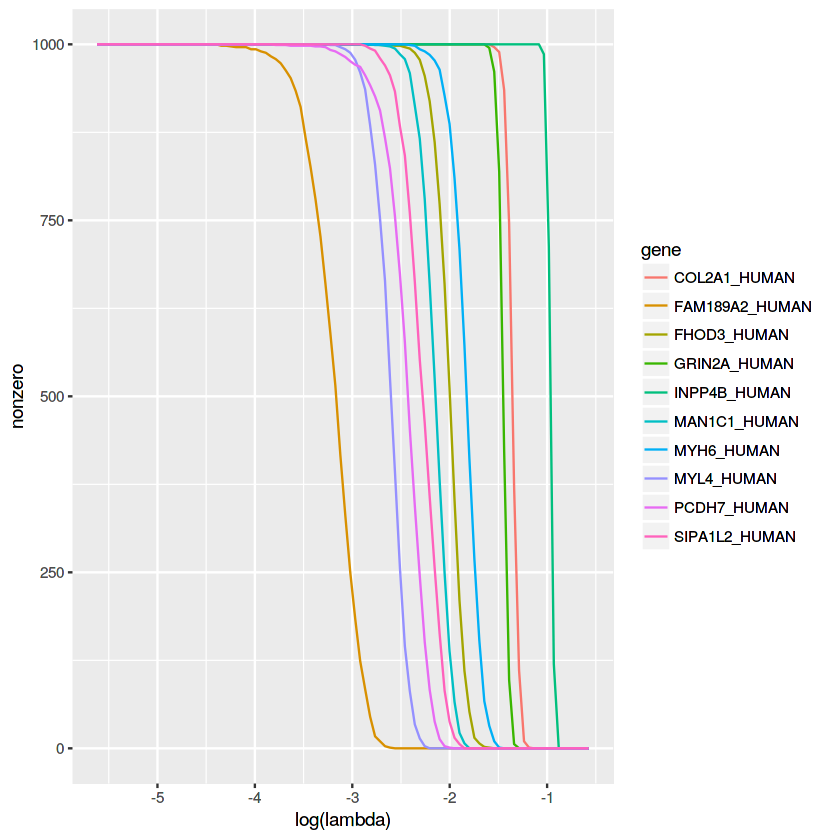

In [149]:
ggplot(track_df[track_df$gene %in% genes_intersect[1:10],], aes(x = log(lambda), y = nonzero, color = gene)) +
  geom_line()

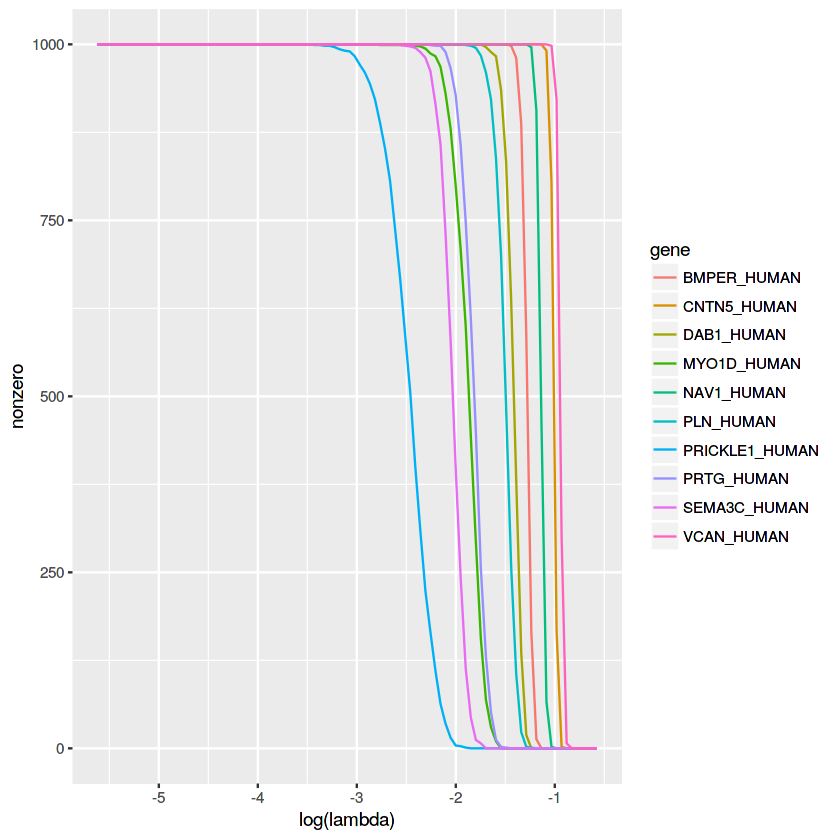

In [150]:
ggplot(track_df[track_df$gene %in% genes_intersect[11:20],], aes(x = log(lambda), y = nonzero, color = gene)) +
  geom_line()

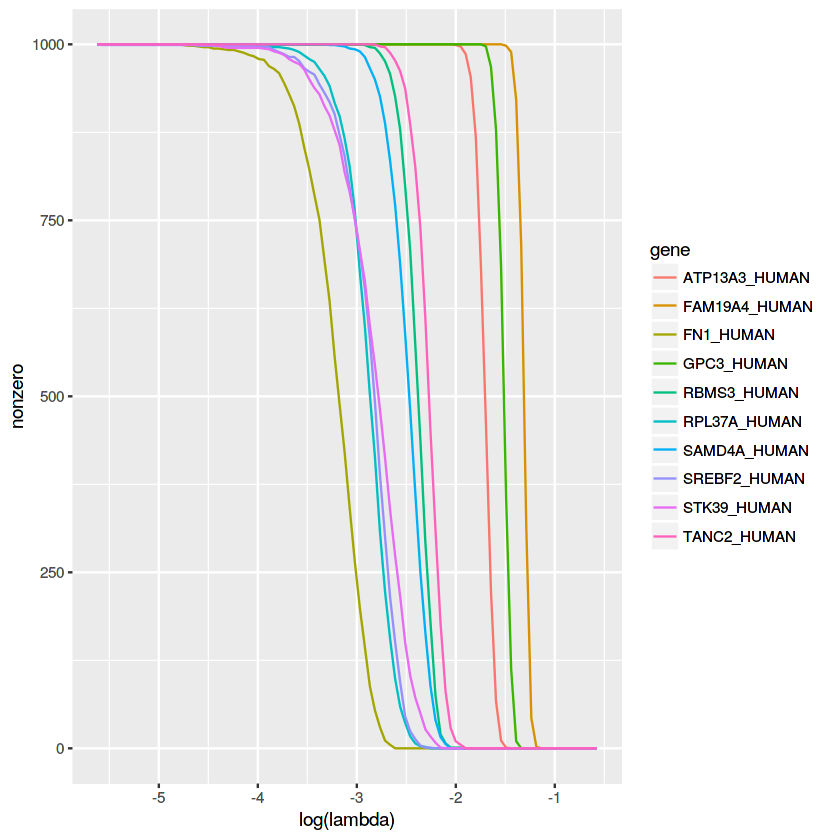

In [151]:
ggplot(track_df[track_df$gene %in% genes_intersect[21:30],], aes(x = log(lambda), y = nonzero, color = gene)) +
  geom_line()

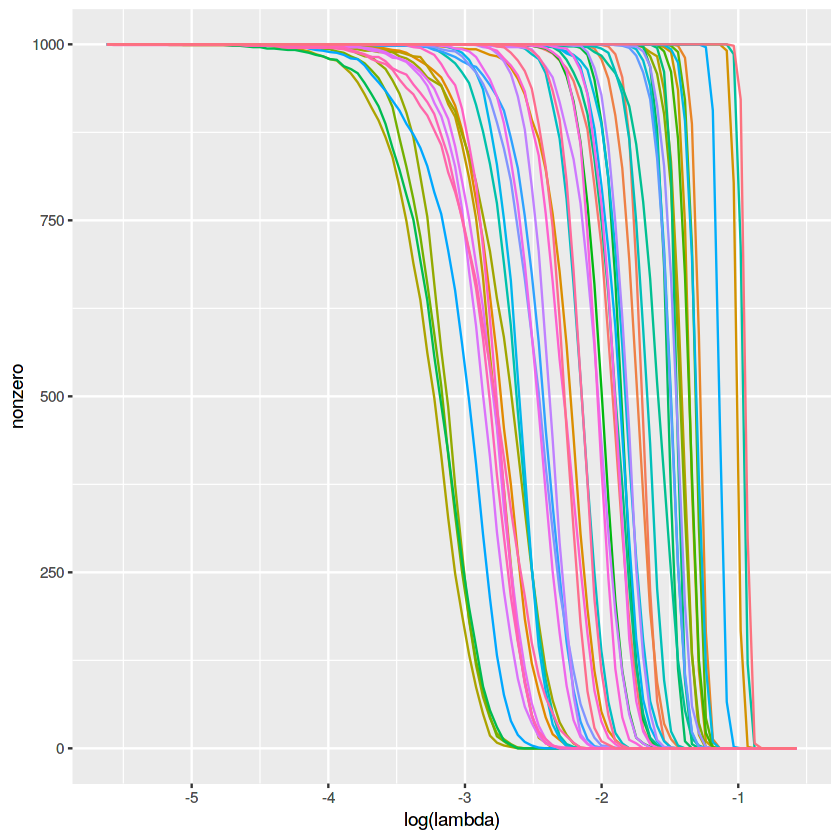

In [152]:
ggplot(track_df[track_df$gene %in% genes_intersect,], aes(x = log(lambda), y = nonzero, color = gene)) +
  geom_line() +
  guides(color=FALSE)

### Sanity check
- fit w/ random gene list
- use model fit w/ random gene list to predict holdout cells

In [235]:
load("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/train_cm_filtered_cells_entrez_only_normalized_counts.RData")

In [236]:
cell_metadata <- read.csv("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/train_cm_filtered_cells_entrez_only_metadata.csv")

In [237]:
head(cell_metadata)

X                      nGene nUMI orig.ident    day protocol cell_line
1 AAACATCGAAACATCG_14_6  1577  2986 SeuratProject D12 Lian     AICS11   
2 AAACATCGAAACATCG_21_10  578   727 SeuratProject D14 Murry    AICS0    
3 AAACATCGAACAACCA_2_9    489   606 SeuratProject D12 Lian     AICS37   
4 AAACATCGAACAACCA_5_8   1117  1511 SeuratProject D14 Murry    AICS0    
5 AAACATCGAACGCTTA_32_8   940  1599 SeuratProject D24 Lian     AICS11   
6 AAACATCGAACTCACC_26_2  2282  4392 SeuratProject D12 Lian     AICS37   
  diff_harvest passage scientist diff_exp  sci_exp ctnt cell_sample
1 08_8_2017    44      KG        7_24_2017 KG_7_24 90   15         
2 08_11_2017   28      KG        7_27_2017 KG_7_27 78   22         
3 07_24_2017   34      AN        7_10_2017 AN_7_10 89    3         
4 07_28_2017   32      AN        7_13_2017 AN_7_13 75    6         
5 08_18_2017   44      KG        7_24_2017 KG_7_24 92   33         
6 08_11_2017   37      KG        7_27_2017 KG_7_27 87   27

In [238]:
cardioAICS <- t(cardioAICS)

cytokine_cells <- cell_metadata$protocol == "Murry"
cardioAICS <- cardioAICS[cytokine_cells,]

diff_day <- cell_metadata$day[cytokine_cells]

diff_day <- gsub('D12|D14', "early", diff_day)
diff_day <- gsub('D24|D26', "late", diff_day)
names(diff_day) <- cell_metadata$X[cytokine_cells]

cell_metadata <- cell_metadata[cytokine_cells,]

In [239]:
head(cell_metadata)

X                      nGene nUMI orig.ident    day protocol cell_line
2  AAACATCGAAACATCG_21_10  578   727 SeuratProject D14 Murry    AICS0    
4  AAACATCGAACAACCA_5_8   1117  1511 SeuratProject D14 Murry    AICS0    
9  AAACATCGAAGACGGA_9_1   1851  2971 SeuratProject D14 Murry    AICS37   
10 AAACATCGAAGAGATC_1_8   1975  3343 SeuratProject D14 Murry    AICS0    
12 AAACATCGAAGGACAC_35_12 1659  2651 SeuratProject D26 Murry    AICS11   
15 AAACATCGAAGGTACA_7_9    618   800 SeuratProject D14 Murry    AICS11   
   diff_harvest passage scientist diff_exp  sci_exp ctnt cell_sample
2  08_11_2017   28      KG        7_27_2017 KG_7_27 78   22         
4  07_28_2017   32      AN        7_13_2017 AN_7_13 75    6         
9  07_28_2017   35      AN        7_13_2017 AN_7_13 96   10         
10 07_24_2017   31      AN        7_10_2017 AN_7_10 92    2         
12 08_18_2017   44      AN        7_24_2017 AN_7_24 92   36         
15 07_28_2017   42      CD        7_13_2017 CD_7_13 94    8

In [240]:
genes.use <- sample(genes, size = 54, replace = FALSE)

In [241]:
diff_day <- as.factor(diff_day)

In [242]:
head(diff_day)

AAACATCGAAACATCG_21_10   AAACATCGAACAACCA_5_8   AAACATCGAAGACGGA_9_1 
                 early                  early                  early 
  AAACATCGAAGAGATC_1_8 AAACATCGAAGGACAC_35_12   AAACATCGAAGGTACA_7_9 
                 early                   late                  early 
Levels: early late

In [243]:
contrasts(diff_day)

late
early 0   
late  1

In [196]:
library(boot)

In [197]:
subset_cardio <- cardioAICS[,genes.use]
subset_cardio <- as.data.frame(as.matrix(subset_cardio))

In [198]:
head(subset_cardio)

RBFOX3_HUMAN BLOC1S5_HUMAN GUF1_HUMAN CALM2_HUMAN
AAACATCGAAACATCG_21_10 0            0             0.000000   0          
AAACATCGAACAACCA_5_8   0            0             0.000000   0          
AAACATCGAAGACGGA_9_1   0            0             0.000000   0          
AAACATCGAAGAGATC_1_8   0            0             0.000000   0          
AAACATCGAAGGACAC_35_12 0            0             1.562799   0          
AAACATCGAAGGTACA_7_9   0            0             0.000000   0          
                       AUH_HUMAN NAIF1_HUMAN MAP2K5_HUMAN COX6CP18_HUMAN
AAACATCGAAACATCG_21_10 0.000000  0           0.000000     0             
AAACATCGAACAACCA_5_8   0.000000  0           2.030531     0             
AAACATCGAAGACGGA_9_1   0.000000  0           2.045334     0             
AAACATCGAAGAGATC_1_8   0.000000  0           0.000000     0             
AAACATCGAAGGACAC_35_12 1.562799  0           0.000000     0             
AAACATCGAAGGTACA_7_9   0.000000  0           0.000000     0             
                       RABGAP1_HUMAN BTN3A3_HUMAN ⋯ NANOGP5_HUMAN VWC2L_HUMAN
AAACATCGAAACATCG_21_10 0.000000      0            ⋯ 0             0          
AAACATCGAACAACCA_5_8   0.000000      0            ⋯ 0             0          
AAACATCGAAGACGGA_9_1   1.473817      0            ⋯ 0             0          
AAACATCGAAGAGATC_1_8   1.384123      0            ⋯ 0             0          
AAACATCGAAGGACAC_35_12 2.145267      0            ⋯ 0             0          
AAACATCGAAGGTACA_7_9   0.000000      0            ⋯ 0             0          
                       COX16_HUMAN NPM1P32_HUMAN LTB4R2_HUMAN OR51B8P_HUMAN
AAACATCGAAACATCG_21_10 0           0             0            0            
AAACATCGAACAACCA_5_8   0           0             0            0            
AAACATCGAAGACGGA_9_1   0           0             0            0            
AAACATCGAAGAGATC_1_8   0           0             0            0            
AAACATCGAAGGACAC_35_12 0           0             0            0            
AAACATCGAAGGTACA_7_9   0           0             0            0            
                       RNU6-222P_HUMAN MDM4_HUMAN ACSM5_HUMAN CSMD2_HUMAN
AAACATCGAAACATCG_21_10 0               0.000000   0           0          
AAACATCGAACAACCA_5_8   0               0.000000   0           0          
AAACATCGAAGACGGA_9_1   0               1.473817   0           0          
AAACATCGAAGAGATC_1_8   0               1.384123   0           0          
AAACATCGAAGGACAC_35_12 0               0.000000   0           0          
AAACATCGAAGGTACA_7_9   0               0.000000   0           0

In [199]:
cost <- function(r, pi = 0) mean(abs(r-pi) > 0.5)

In [200]:
fit <- glm(diff_day ~ .,
    data = subset_cardio, family = binomial("logit")
   )

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [201]:
fit


Call:  glm(formula = diff_day ~ ., family = binomial("logit"), data = subset_cardio)

Coefficients:
      (Intercept)       RBFOX3_HUMAN      BLOC1S5_HUMAN         GUF1_HUMAN  
         -0.72711           -0.07695            0.07324           -0.06541  
      CALM2_HUMAN          AUH_HUMAN        NAIF1_HUMAN       MAP2K5_HUMAN  
         -0.05980           -0.14954            0.06862           -0.01011  
   COX6CP18_HUMAN      RABGAP1_HUMAN       BTN3A3_HUMAN        CEP68_HUMAN  
        -21.37705            0.08430            0.21262            0.12095  
     MARCH1_HUMAN       CFL1P2_HUMAN         PRH2_HUMAN         TTC9_HUMAN  
          0.66435          -15.32374            0.06719            0.17091  
     SPATC1_HUMAN         PER3_HUMAN       TREML4_HUMAN        PALD1_HUMAN  
         -0.20726            0.23279           -0.46089            0.02370  
     ZNF566_HUMAN         MAP9_HUMAN      LAMTOR1_HUMAN      SLC47A1_HUMAN  
          0.06725            0.03547           -0.06

In [202]:
subset_cardio$diff_day <- diff_day

In [203]:
cv.test <- cv.glm(subset_cardio, cost = cost, fit, K = 5)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

In [204]:
cv.test$delta

[1] 0.3284202 0.3290364

In [205]:
load("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/holdout_cm_filtered_cells_entrez_only_normalized_counts.RData")
holdout_cell_metadata <- read.csv("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/holdout_cm_filtered_cells_entrez_only_metadata.csv")

In [206]:
holdout_cardioAICS <- t(holdout_cardioAICS)
holdout_cytokine_cells <- holdout_cell_metadata$protocol == "Murry"
holdout_cardioAICS <- holdout_cardioAICS[holdout_cytokine_cells,]

diff_day <- holdout_cell_metadata$day[holdout_cytokine_cells]

diff_day <- gsub('D12|D14', "early", diff_day)
diff_day <- gsub('D24|D26', "late", diff_day)
names(diff_day) <- holdout_cell_metadata$X[holdout_cytokine_cells]

holdout_cell_metadata <- holdout_cell_metadata[holdout_cytokine_cells,]

In [207]:
holdout_cardioAICS

   [[ suppressing 33 column names ‘TTN_HUMAN’, ‘AATF_HUMAN’, ‘NEXN_HUMAN’ ... ]]


841 x 22187 sparse Matrix of class "dgCMatrix"
                                                                      
AAACATCGAACAACCA_25_11 5.440014 .         2.3570950 .         5.628508
AAACATCGATCCTGTA_47_6  6.525517 .         3.3498237 .         5.684630
AACAACCAAAGGACAC_29_6  6.380718 .         2.1503907 0.8174433 6.200447
AACAACCAACGCTCGA_45_4  3.057713 .         .         .         5.279052
AACAACCAATGCCTAA_3_9   6.145289 .         2.2572998 1.4867954 5.416988
AACAACCAATTGAGGA_5_4   4.667861 .         1.2391808 1.2391808 5.862915
AACAACCACAGATCTG_13_8  2.002126 .         0.7263226 .         5.373240
AACAACCACCTAATCC_1_3   6.123658 .         3.7928779 .         6.544118
AACAACCACTGTAGCC_11_7  6.575511 1.0199477 2.4543012 1.0199477 6.314306
AACAACCAGCCACATA_42_8  6.446798 .         2.3607381 1.5768132 5.891406
AACAACCAGCTAACGA_40_3  .        .         .         1.7449994 5.775672
AACAACCATTCACGCA_37_10 6.365407 .         2.8535218 .         4.623181
AACCGAGAAAACATCG_11_10 6.41004

In [208]:
holdout_mat <- holdout_cardioAICS[,genes.use]
holdout_mat <- as.data.frame(as.matrix(holdout_mat))

In [209]:
holdout_mat

RBFOX3_HUMAN BLOC1S5_HUMAN GUF1_HUMAN CALM2_HUMAN
AAACATCGAACAACCA_25_11 0            0.0000000     0.0000000  0.0000000  
AAACATCGATCCTGTA_47_6  0            0.0000000     0.0000000  0.0000000  
AACAACCAAAGGACAC_29_6  0            0.0000000     0.0000000  0.8174433  
AACAACCAACGCTCGA_45_4  0            0.0000000     1.2626721  0.0000000  
AACAACCAATGCCTAA_3_9   0            0.0000000     0.0000000  1.4867954  
AACAACCAATTGAGGA_5_4   0            1.7758956     0.0000000  0.0000000  
AACAACCACAGATCTG_13_8  0            0.0000000     0.7263226  1.1426060  
AACAACCACCTAATCC_1_3   0            0.0000000     0.0000000  0.0000000  
AACAACCACTGTAGCC_11_7  0            0.0000000     0.0000000  0.0000000  
AACAACCAGCCACATA_42_8  0            0.0000000     0.0000000  1.0714995  
AACAACCAGCTAACGA_40_3  0            0.0000000     0.0000000  0.0000000  
AACAACCATTCACGCA_37_10 0            0.0000000     1.3150120  0.0000000  
AACCGAGAAAACATCG_11_10 0            0.0000000     0.8047306  0.0000000  
AACCGAGAAACGCTTA_42_10 0            0.0000000     0.0000000  0.0000000  
AACCGAGAAGAGTCAA_25_3  0            0.0000000     0.0000000  0.0000000  
AACCGAGAAGTACAAG_15_4  0            0.0000000     0.0000000  2.2765665  
AACCGAGAATCCTGTA_23_6  0            0.0000000     0.0000000  0.0000000  
AACCGAGAATCCTGTA_5_6   0            0.0000000     0.0000000  0.9535466  
AACCGAGACCTCTATC_42_9  0            0.0000000     0.0000000  0.0000000  
AACCGAGACTGTAGCC_17_8  0            0.0000000     0.0000000  0.0000000  
AACCGAGAGCTAACGA_7_5   0            0.0000000     1.2432908  0.8035707  
AACGCTTAACCTCCAA_27_11 0            0.0000000     1.2707278  0.0000000  
AACGCTTACAGATCTG_19_6  0            0.0000000     0.0000000  1.0044493  
AACGCTTACATACCAA_25_8  0            0.0000000     0.0000000  0.0000000  
AACGCTTACCGACAAC_42_1  0            0.0000000     0.0000000  1.6647761  
AACGCTTACCTCCTGA_47_3  0            0.9936108     0.0000000  0.0000000  
AACGCTTACTAAGGTC_9_7   0            0.0000000     0.0000000  1.1277033  
AACGCTTAGCCACATA_47_12 0            0.0000000     1.0773404  0.0000000  
AACGCTTAGTACGCAA_11_9  0            0.0000000     0.0000000  0.0000000  
AACGCTTAGTACGCAA_40_7  0            0.0000000     1.5049335  2.0804046  
⋮                      ⋮            ⋮             ⋮          ⋮          
TGGCTTCAAGATGTAC_25_7  0            0.000000      0.0000000  0.0000000  
TGGCTTCAAGCCATGC_27_12 0            0.000000      0.0000000  0.0000000  
TGGCTTCACAAGACTA_3_9   0            0.000000      0.0000000  0.0000000  
TGGCTTCACACCTTAC_45_2  0            0.000000      0.0000000  0.0000000  
TGGCTTCAGACAGTGC_5_9   0            0.000000      0.0000000  1.8539561  
TGGCTTCAGCGAGTAA_27_12 0            0.000000      0.0000000  0.9469304  
TGGCTTCAGTCTGTCA_25_5  0            0.000000      0.0000000  0.0000000  
TGGCTTCATGGCTTCA_25_5  0            0.000000      0.0000000  0.0000000  
TGGTGGTAAAGACGGA_13_2  0            0.000000      0.0000000  0.0000000  
TGGTGGTAAAGGTACA_27_1  0            0.000000      0.8550679  0.0000000  
TGGTGGTAACAAGCTA_23_12 0            0.000000      0.0000000  0.0000000  
TGGTGGTAAGATGTAC_27_7  0            0.000000      1.2404019  1.2404019  
TGGTGGTAAGGCTAAC_13_11 0            0.000000      0.0000000  0.0000000  
TGGTGGTAATAGCGAC_29_7  0            0.000000      0.0000000  0.0000000  
TGGTGGTACACCTTAC_1_1   0            0.000000      0.0000000  1.0797734  
TGGTGGTACGAACTTA_31_5  0            1.199697      0.0000000  0.0000000  
TGGTGGTAGATGAATC_45_11 0            0.000000      0.0000000  0.0000000  
TGGTGGTAGGAGAACA_29_8  0            0.000000      0.0000000  0.0000000  
TGGTGGTAGTCGTAGA_5_5   0            0.000000      0.0000000  0.0000000  
TGGTGGTATTCACGCA_21_1  0            0.000000      0.0000000  0.0000000  
TTCACGCAAAGGACAC_3_5   0            0.000000      0.0000000  1.9199653  
TTCACGCAAAGGTACA_35_11 0            0.000000      1.0624948  2.1487720  
TTCACGCAACACGACC_11_3  0            0.000000      0.0000000  0.0000000  
TTCACGCA

In [210]:
dim(holdout_mat)

[1] 841  54

In [211]:
holdout_predict <- predict(fit, newdata = holdout_mat, type = c("response"))

In [212]:
holdout_predict

AAACATCGAACAACCA_25_11  AAACATCGATCCTGTA_47_6  AACAACCAAAGGACAC_29_6 
          4.118277e-01           4.583383e-01           2.956559e-01 
 AACAACCAACGCTCGA_45_4   AACAACCAATGCCTAA_3_9   AACAACCAATTGAGGA_5_4 
          5.415436e-01           3.212763e-01           1.689182e-01 
 AACAACCACAGATCTG_13_8   AACAACCACCTAATCC_1_3  AACAACCACTGTAGCC_11_7 
          3.223259e-01           3.258291e-01           2.262728e-01 
 AACAACCAGCCACATA_42_8  AACAACCAGCTAACGA_40_3 AACAACCATTCACGCA_37_10 
          5.135328e-01           7.801136e-01           4.116591e-01 
AACCGAGAAAACATCG_11_10 AACCGAGAAACGCTTA_42_10  AACCGAGAAGAGTCAA_25_3 
          3.826347e-01           3.539284e-01           4.415806e-01 
 AACCGAGAAGTACAAG_15_4  AACCGAGAATCCTGTA_23_6   AACCGAGAATCCTGTA_5_6 
          2.210897e-01           3.078162e-01           2.483597e-01 
 AACCGAGACCTCTATC_42_9  AACCGAGACTGTAGCC_17_8   AACCGAGAGCTAACGA_7_5 
          2.217434e-01           3.776838e-01           3.378990e-01 
AACGCTTAACCTCCAA_27_11  AACGCTTACAGATCTG_19_6  AACGCTTACATACCAA_25_8 
          2.376285e-01           3.434370e-01           2.493464e-01 
 AACGCTTACCGACAAC_42_1  AACGCTTACCTCCTGA_47_3   AACGCTTACTAAGGTC_9_7 
          3.548573e-01           3.824472e-01           4.681795e-01 
AACGCTTAGCCACATA_47_12  AACGCTTAGTACGCAA_11_9  AACGCTTAGTACGCAA_40_7 
          3.436987e-01           3.697228e-01           4.725309e-01 
AACGTGATACAGCAGA_19_11  AACGTGATAGAGTCAA_42_3  AACGTGATAGCCATGC_37_2 
          2.912655e-01           1.373910e-01           4.306381e-01 
 AACGTGATCAAGACTA_19_5 AACGTGATCACCTTAC_42_10   AACGTGATCACCTTAC_7_1 
          3.369902e-01           8.518298e-01           1.202731e-01 
AACGTGATCAGCGTTA_29_12  AACGTGATCCTAATCC_27_8 AACGTGATCGACTGGA_17_12 
          2.634939e-01           3.075016e-01           4.229906e-01 
 AACGTGATGACAGTGC_13_8  AACGTGATGATAGACA_42_4  AACTCACCAAGAGATC_27_9 
          3.219922e-01           2.777747e-01           3.084723e-01 
 AACTCACCACACGACC_37_3  AACTCACCAGAGTCAA_35_3  AACTCACCAGCACCTC_17_6 
          2.983805e-01           3.713614e-01           3.704144e-01 
 AACTCACCAGTGGTCA_17_9  AACTCACCCCAGTTCA_29_6  AACTCACCCGACTGGA_13_7 
          3.189162e-01           4.102796e-01           3.384163e-01 
 AACTCACCCGCATACA_45_6  AACTCACCCTGAGCCA_19_7  AACTCACCGCTAACGA_21_2 
          3.296903e-01           4.450621e-01           2.169713e-01 
 AAGACGGAAACGTGAT_25_9  AAGACGGAAAGACGGA_31_3  AAGACGGAAAGAGATC_13_3 
          2.824312e-01           3.038588e-01           3.834055e-01 
 AAGACGGAACACAGAA_29_6   AAGACGGAACAGATTC_7_9  AAGACGGAACGCTCGA_27_1 
          3.436279e-01           2.129866e-01           4.522218e-01 
AAGACGGAAGCCATGC_47_11  AAGACGGAATGCCTAA_13_5  AAGACGGACATACCAA_41_7 
          2.764663e-01           3.104177e-01           7.445792e-01 
  AAGACGGACCGACAAC_9_8  AAGACGGACCTCTATC_21_8 AAGACGGAGAGCTGAA_13_11 
          2.646049e-01           2.533492e-01           6.203933e-01 
  AAGACGGAGCGAGTAA_5_5  AAGACGGAGCTCGGTA_19_7  AAGACGGAGTCGTAGA_23_7 
          2.613998e-01           3.422871e-01           2.550099e-01 
 AAGACGGAGTCTGTCA_41_6   AAGAGATCACAGCAGA_7_5  AAGAGATCACATTGGC_33_7 
          4.208344e-01           2.395928e-01           3.427165e-01 
  AAGAGATCAGGCTAAC_7_4  AAGAGATCATAGCGAC_23_5 AAGAGATCATAGCGAC_39_12 
          3.150892e-01           2.235152e-01           3.367845e-01 
 AAGAGATCCTGAGCCA_45_1 AAGGACACAAGGTACA_17_11 AAGGACACACCACTGT_37_10 
          4.540158e-01           4.290950e-01           6.273039e-01 
AAGGACACCGACACAC_33_11 AAGGACACCTAAGGTC_42_11  AAGGACACGCCACATA_39_9 
          4.749846e-01           2.888364e-01           4.525366e-01 
  AAGGACACGCTAACGA_1_9 AAGGACACGTGTTCTA_27_10  AAGGACACTGGTGGTA_17_4 
          2.149162e-01           2.843505e-01           3.750075e-01 
 AAGGTACAACACAGAA_17_1   AAGGTACAACAGATTC_1_1   AAGGTACAACATTGGC_9_1 
          4.101650e-01           2.573058e-01           4.913342e-01 
 AAGGTACAATGCCTAA_25_7 AAGGTACAGCCACATA_21_12  AAGGTACATATCAGCA_17_2 
          

In [213]:
diff_day

AAACATCGAACAACCA_25_11  AAACATCGATCCTGTA_47_6  AACAACCAAAGGACAC_29_6 
               "early"                 "late"                 "late" 
 AACAACCAACGCTCGA_45_4   AACAACCAATGCCTAA_3_9   AACAACCAATTGAGGA_5_4 
                "late"                "early"                "early" 
 AACAACCACAGATCTG_13_8   AACAACCACCTAATCC_1_3  AACAACCACTGTAGCC_11_7 
               "early"                "early"                "early" 
 AACAACCAGCCACATA_42_8  AACAACCAGCTAACGA_40_3 AACAACCATTCACGCA_37_10 
                "late"                 "late"                 "late" 
AACCGAGAAAACATCG_11_10 AACCGAGAAACGCTTA_42_10  AACCGAGAAGAGTCAA_25_3 
               "early"                 "late"                "early" 
 AACCGAGAAGTACAAG_15_4  AACCGAGAATCCTGTA_23_6   AACCGAGAATCCTGTA_5_6 
               "early"                "early"                "early" 
 AACCGAGACCTCTATC_42_9  AACCGAGACTGTAGCC_17_8   AACCGAGAGCTAACGA_7_5 
                "late"                "early"                "early" 
AACGCTTAACCTCCAA_27_11  AACGCTTACAGATCTG_19_6  AACGCTTACATACCAA_25_8 
               "early"                "early"                "early" 
 AACGCTTACCGACAAC_42_1  AACGCTTACCTCCTGA_47_3   AACGCTTACTAAGGTC_9_7 
                "late"                 "late"                "early" 
AACGCTTAGCCACATA_47_12  AACGCTTAGTACGCAA_11_9  AACGCTTAGTACGCAA_40_7 
                "late"                "early"                 "late" 
AACGTGATACAGCAGA_19_11  AACGTGATAGAGTCAA_42_3  AACGTGATAGCCATGC_37_2 
               "early"                 "late"                 "late" 
 AACGTGATCAAGACTA_19_5 AACGTGATCACCTTAC_42_10   AACGTGATCACCTTAC_7_1 
               "early"                 "late"                "early" 
AACGTGATCAGCGTTA_29_12  AACGTGATCCTAATCC_27_8 AACGTGATCGACTGGA_17_12 
                "late"                "early"                "early" 
 AACGTGATGACAGTGC_13_8  AACGTGATGATAGACA_42_4  AACTCACCAAGAGATC_27_9 
               "early"                 "late"                "early" 
 AACTCACCACACGACC_37_3  AACTCACCAGAGTCAA_35_3  AACTCACCAGCACCTC_17_6 
                "late"                 "late"                "early" 
 AACTCACCAGTGGTCA_17_9  AACTCACCCCAGTTCA_29_6  AACTCACCCGACTGGA_13_7 
               "early"                 "late"                "early" 
 AACTCACCCGCATACA_45_6  AACTCACCCTGAGCCA_19_7  AACTCACCGCTAACGA_21_2 
                "late"                "early"                "early" 
 AAGACGGAAACGTGAT_25_9  AAGACGGAAAGACGGA_31_3  AAGACGGAAAGAGATC_13_3 
               "early"                 "late"                "early" 
 AAGACGGAACACAGAA_29_6   AAGACGGAACAGATTC_7_9  AAGACGGAACGCTCGA_27_1 
                "late"                "early"                "early" 
AAGACGGAAGCCATGC_47_11  AAGACGGAATGCCTAA_13_5  AAGACGGACATACCAA_41_7 
                "late"                "early"                 "late" 
  AAGACGGACCGACAAC_9_8  AAGACGGACCTCTATC_21_8 AAGACGGAGAGCTGAA_13_11 
               "early"                "early"                "early" 
  AAGACGGAGCGAGTAA_5_5  AAGACGGAGCTCGGTA_19_7  AAGACGGAGTCGTAGA_23_7 
               "early"                "early"                "early" 
 AAGACGGAGTCTGTCA_41_6   AAGAGATCACAGCAGA_7_5  AAGAGATCACATTGGC_33_7 
                "late"                "early"                 "late" 
  AAGAGATCAGGCTAAC_7_4  AAGAGATCATAGCGAC_23_5 AAGAGATCATAGCGAC_39_12 
               "early"                "early"                 "late" 
 AAGAGATCCTGAGCCA_45_1 AAGGACACAAGGTACA_17_11 AAGGACACACCACTGT_37_10 
                "late"                "early"                 "late" 
AAGGACACCGACACAC_33_11 AAGGACACCTAAGGTC_42_11  AAGGACACGCCACATA_39_9 
                "late"                 "late"                 "late" 
  AAGGACACGCTAACGA_1_9 AAGGACACGTGTTCTA_27_10  AAGGACACTGGTGGTA_17_4 
               "early"                "early"                "early" 
 AAGGTACAACACAGAA_17_1   AAGGTACAACAGATTC_1_1   AAGGTACAACATTGGC_9_1 
               "early"                "early"                "early" 
 AAGGTACAATGCCTAA_25_7 AAGGTACAGCCACATA_21_12  AAGGTACATATCAGCA_17_2 
          

In [214]:
class(holdout_predict)

[1] "numeric"

In [215]:
get_predicted_time <- function(predict_prob) {
    if (predict_prob < 0.5) {
        return("early")
    } else {
        return("late")
    }
}

In [216]:
predicted_day <- sapply(holdout_predict, get_predicted_time, simplify = TRUE)

In [217]:
predicted_day

AAACATCGAACAACCA_25_11  AAACATCGATCCTGTA_47_6  AACAACCAAAGGACAC_29_6 
               "early"                "early"                "early" 
 AACAACCAACGCTCGA_45_4   AACAACCAATGCCTAA_3_9   AACAACCAATTGAGGA_5_4 
                "late"                "early"                "early" 
 AACAACCACAGATCTG_13_8   AACAACCACCTAATCC_1_3  AACAACCACTGTAGCC_11_7 
               "early"                "early"                "early" 
 AACAACCAGCCACATA_42_8  AACAACCAGCTAACGA_40_3 AACAACCATTCACGCA_37_10 
                "late"                 "late"                "early" 
AACCGAGAAAACATCG_11_10 AACCGAGAAACGCTTA_42_10  AACCGAGAAGAGTCAA_25_3 
               "early"                "early"                "early" 
 AACCGAGAAGTACAAG_15_4  AACCGAGAATCCTGTA_23_6   AACCGAGAATCCTGTA_5_6 
               "early"                "early"                "early" 
 AACCGAGACCTCTATC_42_9  AACCGAGACTGTAGCC_17_8   AACCGAGAGCTAACGA_7_5 
               "early"                "early"                "early" 
AACGCTTAACCTCCAA_27_11  AACGCTTACAGATCTG_19_6  AACGCTTACATACCAA_25_8 
               "early"                "early"                "early" 
 AACGCTTACCGACAAC_42_1  AACGCTTACCTCCTGA_47_3   AACGCTTACTAAGGTC_9_7 
               "early"                "early"                "early" 
AACGCTTAGCCACATA_47_12  AACGCTTAGTACGCAA_11_9  AACGCTTAGTACGCAA_40_7 
               "early"                "early"                "early" 
AACGTGATACAGCAGA_19_11  AACGTGATAGAGTCAA_42_3  AACGTGATAGCCATGC_37_2 
               "early"                "early"                "early" 
 AACGTGATCAAGACTA_19_5 AACGTGATCACCTTAC_42_10   AACGTGATCACCTTAC_7_1 
               "early"                 "late"                "early" 
AACGTGATCAGCGTTA_29_12  AACGTGATCCTAATCC_27_8 AACGTGATCGACTGGA_17_12 
               "early"                "early"                "early" 
 AACGTGATGACAGTGC_13_8  AACGTGATGATAGACA_42_4  AACTCACCAAGAGATC_27_9 
               "early"                "early"                "early" 
 AACTCACCACACGACC_37_3  AACTCACCAGAGTCAA_35_3  AACTCACCAGCACCTC_17_6 
               "early"                "early"                "early" 
 AACTCACCAGTGGTCA_17_9  AACTCACCCCAGTTCA_29_6  AACTCACCCGACTGGA_13_7 
               "early"                "early"                "early" 
 AACTCACCCGCATACA_45_6  AACTCACCCTGAGCCA_19_7  AACTCACCGCTAACGA_21_2 
               "early"                "early"                "early" 
 AAGACGGAAACGTGAT_25_9  AAGACGGAAAGACGGA_31_3  AAGACGGAAAGAGATC_13_3 
               "early"                "early"                "early" 
 AAGACGGAACACAGAA_29_6   AAGACGGAACAGATTC_7_9  AAGACGGAACGCTCGA_27_1 
               "early"                "early"                "early" 
AAGACGGAAGCCATGC_47_11  AAGACGGAATGCCTAA_13_5  AAGACGGACATACCAA_41_7 
               "early"                "early"                 "late" 
  AAGACGGACCGACAAC_9_8  AAGACGGACCTCTATC_21_8 AAGACGGAGAGCTGAA_13_11 
               "early"                "early"                 "late" 
  AAGACGGAGCGAGTAA_5_5  AAGACGGAGCTCGGTA_19_7  AAGACGGAGTCGTAGA_23_7 
               "early"                "early"                "early" 
 AAGACGGAGTCTGTCA_41_6   AAGAGATCACAGCAGA_7_5  AAGAGATCACATTGGC_33_7 
               "early"                "early"                "early" 
  AAGAGATCAGGCTAAC_7_4  AAGAGATCATAGCGAC_23_5 AAGAGATCATAGCGAC_39_12 
               "early"                "early"                "early" 
 AAGAGATCCTGAGCCA_45_1 AAGGACACAAGGTACA_17_11 AAGGACACACCACTGT_37_10 
               "early"                "early"                 "late" 
AAGGACACCGACACAC_33_11 AAGGACACCTAAGGTC_42_11  AAGGACACGCCACATA_39_9 
               "early"                "early"                "early" 
  AAGGACACGCTAACGA_1_9 AAGGACACGTGTTCTA_27_10  AAGGACACTGGTGGTA_17_4 
               "early"                "early"                "early" 
 AAGGTACAACACAGAA_17_1   AAGGTACAACAGATTC_1_1   AAGGTACAACATTGGC_9_1 
               "early"                "early"                "early" 
 AAGGTACAATGCCTAA_25_7 AAGGTACAGCCACATA_21_12  AAGGTACATATCAGCA_17_2 
          

In [218]:
predict_actual_df <- data.frame("predicted" = predicted_day, "actual" = diff_day)
xtabs(~ predicted + actual, data = predict_actual_df)

         actual
predicted early late
    early   523  247
    late     30   41

In [184]:
497/(497+220)

[1] 0.693166

In [185]:
220+68

[1] 288

In [186]:
497+56

[1] 553

In [187]:
288+553

[1] 841

In [232]:
contrasts(as.factor(mtcars$am))

1
0 0
1 1

In [231]:
mtcars

mpg  cyl disp  hp  drat wt    qsec  vs am gear carb
Mazda RX4           21.0 6   160.0 110 3.90 2.620 16.46 0  1  4    4   
Mazda RX4 Wag       21.0 6   160.0 110 3.90 2.875 17.02 0  1  4    4   
Datsun 710          22.8 4   108.0  93 3.85 2.320 18.61 1  1  4    1   
Hornet 4 Drive      21.4 6   258.0 110 3.08 3.215 19.44 1  0  3    1   
Hornet Sportabout   18.7 8   360.0 175 3.15 3.440 17.02 0  0  3    2   
Valiant             18.1 6   225.0 105 2.76 3.460 20.22 1  0  3    1   
Duster 360          14.3 8   360.0 245 3.21 3.570 15.84 0  0  3    4   
Merc 240D           24.4 4   146.7  62 3.69 3.190 20.00 1  0  4    2   
Merc 230            22.8 4   140.8  95 3.92 3.150 22.90 1  0  4    2   
Merc 280            19.2 6   167.6 123 3.92 3.440 18.30 1  0  4    4   
Merc 280C           17.8 6   167.6 123 3.92 3.440 18.90 1  0  4    4   
Merc 450SE          16.4 8   275.8 180 3.07 4.070 17.40 0  0  3    3   
Merc 450SL          17.3 8   275.8 180 3.07 3.730 17.60 0  0  3    3   
Merc 450SLC         15.2 8   275.8 180 3.07 3.780 18.00 0  0  3    3   
Cadillac Fleetwood  10.4 8   472.0 205 2.93 5.250 17.98 0  0  3    4   
Lincoln Continental 10.4 8   460.0 215 3.00 5.424 17.82 0  0  3    4   
Chrysler Imperial   14.7 8   440.0 230 3.23 5.345 17.42 0  0  3    4   
Fiat 128            32.4 4    78.7  66 4.08 2.200 19.47 1  1  4    1   
Honda Civic         30.4 4    75.7  52 4.93 1.615 18.52 1  1  4    2   
Toyota Corolla      33.9 4    71.1  65 4.22 1.835 19.90 1  1  4    1   
Toyota Corona       21.5 4   120.1  97 3.70 2.465 20.01 1  0  3    1   
Dodge Challenger    15.5 8   318.0 150 2.76 3.520 16.87 0  0  3    2   
AMC Javelin         15.2 8   304.0 150 3.15 3.435 17.30 0  0  3    2   
Camaro Z28          13.3 8   350.0 245 3.73 3.840 15.41 0  0  3    4   
Pontiac Firebird    19.2 8   400.0 175 3.08 3.845 17.05 0  0  3    2   
Fiat X1-9           27.3 4    79.0  66 4.08 1.935 18.90 1  1  4    1   
Porsche 914-2       26.0 4   120.3  91 4.43 2.140 16.70 0  1  5    2   
Lotus Europa        30.4 4    95.1 113 3.77 1.513 16.90 1  1  5    2   
Ford Pantera L      15.8 8   351.0 264 4.22 3.170 14.50 0  1  5    4   
Ferrari Dino        19.7 6   145.0 175 3.62 2.770 15.50 0  1  5    6   
Maserati Bora       15.0 8   301.0 335 3.54 3.570 14.60 0  1  5    8   
Volvo 142E          21.4 4   121.0 109 4.11 2.780 18.60 1  1  4    2

In [233]:
mean(predict_actual_df$actual != predict_actual_df$predicted)

[1] 0.3293698

In [234]:
1 - 0.329369797859691

[1] 0.6706302